In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
data = pd.read_csv('D:/第四篇论文数据/第二篇论文编写程序/人类行为时空特性关联性建模/浙江省手机信令数据集/visit_duration_distance_v.csv')
elon_elat_data = data[['etime','elon', 'elat']]

In [9]:
elon_elat_data

,etime,elon,elat
0,2018-06-03 08:11:00,119.488,29.223
1,2018-06-03 10:54:00,119.451,29.220
2,2018-06-03 11:43:00,119.458,29.215
3,2018-06-04 08:17:00,119.505,29.187
4,2018-06-04 17:39:00,119.488,29.223
...,...,...,...
2745785,2018-06-24 19:09:00,120.715,30.755
2745786,2018-06-25 10:02:00,120.722,30.759
2745787,2018-06-30 10:59:00,120.813,30.540
2745788,2018-06-06 05:12:00,120.722,30.759


In [10]:
import pandas as pd

# 从CSV文件加载数据
data = pd.read_csv('D:/第四篇论文数据/第二篇论文编写程序/人类行为时空特性关联性建模/浙江省手机信令数据集/visit_duration_distance_v.csv')

# 选择所需的列
elon_elat_data = data[['etime','elon', 'elat']]

# 保存到桌面
desktop_path = 'C:/Users/21523/Desktop/'  # 替换YourUserName为你的用户名
elon_elat_data.to_csv(desktop_path + 'elon_elat_data.csv', index=False)

In [12]:
# 将etime列转换为日期时间格式
elon_elat_data['etime'] = pd.to_datetime(elon_elat_data['etime'])

# 将日期时间格式改为每天
elon_elat_data['etime'] = elon_elat_data['etime'].dt.date

# 打印结果或将结果保存到文件中
elon_elat_data

C:\Users\21523\AppData\Local\Temp\ipykernel_16448\4255736816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elon_elat_data['etime'] = pd.to_datetime(elon_elat_data['etime'])
C:\Users\21523\AppData\Local\Temp\ipykernel_16448\4255736816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elon_elat_data['etime'] = elon_elat_data['etime'].dt.date


,etime,elon,elat
0,2018-06-03,119.488,29.223
1,2018-06-03,119.451,29.220
2,2018-06-03,119.458,29.215
3,2018-06-04,119.505,29.187
4,2018-06-04,119.488,29.223
...,...,...,...
2745785,2018-06-24,120.715,30.755
2745786,2018-06-25,120.722,30.759
2745787,2018-06-30,120.813,30.540
2745788,2018-06-06,120.722,30.759


In [18]:
import pandas as pd

# 假设df是你的数据框，其中有一个名为'etime'的列包含完整的时间戳
# 示例数据：
data = elon_elat_data['etime']
df = pd.DataFrame(data)

# 将'etime'列转换为日期格式
df['etime'] = pd.to_datetime(df['etime']).dt.date

print(df)

              etime
0        2018-06-03
1        2018-06-03
2        2018-06-03
3        2018-06-04
4        2018-06-04
...             ...
2745785  2018-06-24
2745786  2018-06-25
2745787  2018-06-30
2745788  2018-06-06
2745789  2018-06-06

[2745790 rows x 1 columns]


In [26]:
import pandas as pd

# 加载elon_elat_data.csv文件和浙江交通栅格.csv文件
elon_elat_data = pd.read_csv(r'C:\Users\21523\Desktop\elon_elat_data.csv')
grid_data = pd.read_csv(r'C:\Users\21523\Desktop\金老板论文的图\浙江交通栅格.csv')

# 假设elon_elat_data.csv文件里有elon和elat两列分别代表经度和纬度
# 假设浙江交通栅格.csv文件里有四列：min_lon、max_lon、min_lat、max_lat

# 筛选在栅格范围内的数据点
filtered_data = pd.DataFrame()
for index, row in grid_data.iterrows():
    grid_min_lon = row['min_lon']
    grid_max_lon = row['max_lon']
    grid_min_lat = row['min_lat']
    grid_max_lat = row['max_lat']
    
    grid_filtered_data = elon_elat_data[(elon_elat_data['elon'] >= grid_min_lon) & 
                                         (elon_elat_data['elon'] <= grid_max_lon) & 
                                         (elon_elat_data['elat'] >= grid_min_lat) & 
                                         (elon_elat_data['elat'] <= grid_max_lat)]
    
    filtered_data = pd.concat([filtered_data, grid_filtered_data])
    
# 将时间列解析为datetime类型
filtered_data['etime'] = pd.to_datetime(filtered_data['etime'])

# 提取年月日并覆盖原始列
filtered_data['etime'] = filtered_data['etime'].dt.strftime('%Y-%m-%d')

# 输出筛选结果
print(filtered_data) 

              etime     elon    elat
4710     2018-06-16  119.070  27.625
4723     2018-06-15  119.070  27.625
4724     2018-06-15  119.093  27.627
4725     2018-06-15  119.071  27.623
4726     2018-06-15  119.070  27.625
...             ...      ...     ...
2739750  2018-06-23  120.044  29.490
2739751  2018-06-23  120.039  29.500
2739752  2018-06-26  120.044  29.505
2739753  2018-06-26  120.050  29.496
2739754  2018-06-26  120.061  29.494

[2393285 rows x 3 columns]


In [34]:
import pandas as pd
import os

# 将时间列解析为datetime类型
filtered_data['etime'] = pd.to_datetime(filtered_data['etime'])

# 提取日期部分并转换为字符串
filtered_data['date'] = filtered_data['etime'].dt.strftime('%Y-%m-%d')

# 按日期分组并计算每个日期的数据条目数量
date_counts = filtered_data['date'].value_counts()

# 对日期进行排序
date_counts_sorted = date_counts.sort_index()

# 创建DataFrame
df = pd.DataFrame({'日期': date_counts_sorted.index, '数据条数': date_counts_sorted.values})

# 获取桌面路径
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# 将DataFrame保存到Excel文件
excel_file = os.path.join(desktop_path, 'date_counts.xlsx')
df.to_excel(excel_file, index=False)

print("数据已保存到", excel_file, "文件中。")

数据已保存到 C:\Users\21523\Desktop\date_counts.xlsx 文件中。


C:\Users\21523\AppData\Local\Temp\ipykernel_5460\1821899383.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data['数据条数'], color=colors[0], shade=True, linewidth=0)


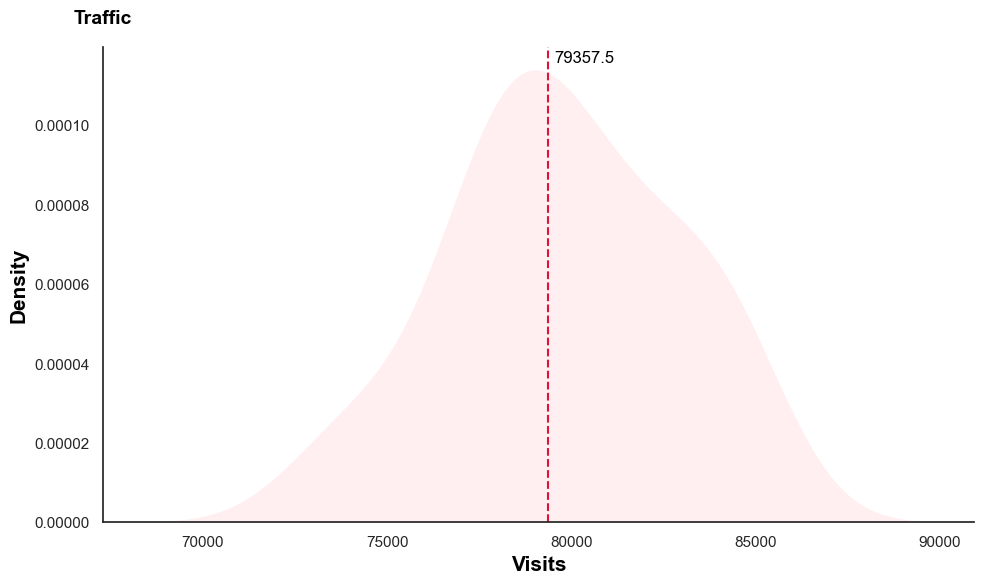

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

# 加载数据
file_path = 'C:\\Users\\21523\\Desktop\\Traffic.xlsx'
data = pd.read_excel(file_path)

# 设置绘图风格为纯白色背景，无网格线
sns.set(style="white")

# 设置绘图尺寸
plt.figure(figsize=(10, 6))

# 定义浅蓝色和深蓝色的配色方案
colors = ['#FFC0CB', '#DC143C']

# 绘制核密度估计图，只绘制阴影部分
sns.kdeplot(data=data['数据条数'], color=colors[0], shade=True, linewidth=0)

# 添加中位数线
median_value = data['数据条数'].median()
plt.axvline(x=median_value, color=colors[1], linestyle='--')

#plt.grid(axis='y', linestyle='--', alpha=0.5)

# 在中位数线上标注中位数值
plt.text(median_value+1000, 0.000115, f'{median_value}', color='black', fontsize=12, ha='center', va='bottom')

# 设置标签和标题的字体样式
plt.xlabel('Visits', fontsize=15, fontweight='bold', color='black')
plt.ylabel('Density', fontsize=15, fontweight='bold', color='black')

# 移除顶部和右侧的边框线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置标题，将其放在 y 轴上方
plt.text(0, 1.05, 'Traffic', fontsize=14, fontweight='bold', color='black', transform=plt.gca().transAxes, ha='center')

# 调整布局以确保不会被切断
plt.tight_layout()

# 保存图形到桌面
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
plt.savefig(os.path.join(desktop_path, "Traffic.png"))

# 显示图形
plt.show()